In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

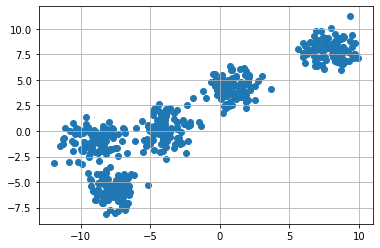

In [56]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [61]:
k = 5

color = ["green", "red", "blue", "yellow", "orange"]

clusters = {}

for i in range(k):
    # points between -10 to 10
    center = 10*(2*np.random.random((X.shape[1],))-1)
    
    points = []
    
    cluster = {
        "center":center,
        "points":points,
        "color":color[i]
    }
    
    clusters[i] = cluster
print(clusters)

{0: {'center': array([-5.16984233, -7.56487736]), 'points': [], 'color': 'green'}, 1: {'center': array([-5.42707548,  4.57996167]), 'points': [], 'color': 'red'}, 2: {'center': array([7.99552557, 3.93999145]), 'points': [], 'color': 'blue'}, 3: {'center': array([-6.07322036, -8.5775195 ]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-1.99331918,  9.9382609 ]), 'points': [], 'color': 'orange'}}


In [62]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [63]:
v1 = np.array([1,2])
v2 = np.array([3,5])
distance(v1, v2)

3.605551275463989

In [64]:
# e -step
def assignPointToClusters():
    for ix in range(X.shape[0]):
        dist = []
        curr_x= X[ix]

        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
  
    #m -step
def updateClusters():
    # update every cluster center according to mean of the points in it
    for kx in range(k):    
        pts = np.array(clusters[kx]['points'])

        if pts.shape[0] > 0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotClusters():
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        # plot the points
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        # plot cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker="*")

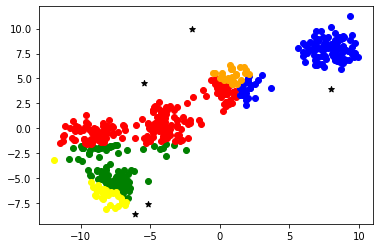

In [65]:
assignPointToClusters()
plotClusters()
updateClusters()

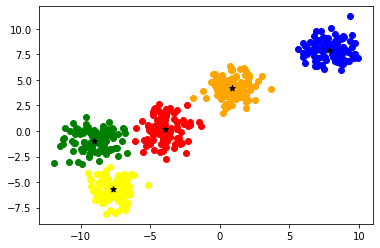

In [80]:
assignPointToClusters()
plotClusters()
updateClusters()

In [81]:
### better initialisation

In [82]:
from sklearn.cluster import KMeans

In [88]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X,y)

KMeans(n_clusters=5)

In [89]:
centers = kmeans.cluster_centers_

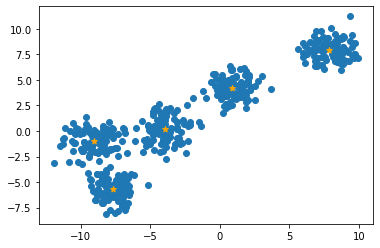

In [90]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], marker="*", color="orange")
plt.show()

In [91]:
pred = kmeans.labels_

In [96]:
print(pred)

[4 1 0 4 4 0 2 4 1 4 1 0 1 4 0 4 1 4 4 1 3 3 4 0 4 3 2 2 0 2 4 2 3 3 4 3 1
 1 4 3 3 3 2 2 0 1 1 2 2 2 1 4 2 4 4 3 4 4 1 0 1 0 0 4 2 1 0 0 3 0 3 4 3 4
 3 0 4 2 3 3 0 3 0 2 1 2 0 1 2 0 2 3 4 3 3 1 4 0 0 3 1 3 0 0 1 1 1 0 0 4 1
 2 4 1 0 3 1 2 3 0 1 0 2 4 3 2 2 2 4 4 0 0 4 1 1 2 0 2 0 4 4 3 0 1 2 4 1 1
 4 0 4 4 0 0 1 3 3 2 0 4 3 1 2 3 1 3 1 3 3 3 2 4 3 1 3 2 4 0 1 2 1 4 1 3 2
 2 3 4 0 1 3 0 2 4 2 3 0 2 4 4 4 3 3 1 4 2 2 4 1 4 4 4 3 1 0 1 4 4 1 2 0 2
 2 3 4 0 4 0 2 3 0 0 4 3 4 3 0 1 0 3 3 1 4 4 0 0 3 1 3 4 2 1 2 4 2 2 2 2 1
 3 1 4 3 1 2 0 1 1 1 2 4 4 0 3 3 1 0 0 4 0 2 0 1 1 2 2 3 2 2 1 3 4 0 3 0 2
 0 0 1 4 3 1 3 3 4 2 3 0 3 2 4 4 0 1 3 2 1 3 0 2 1 2 4 3 2 0 0 3 3 3 4 2 3
 4 1 0 0 2 1 1 0 0 2 3 3 3 4 2 1 2 4 3 1 1 0 3 3 2 3 2 0 0 0 2 3 4 3 0 2 2
 1 4 1 2 4 2 0 1 3 1 0 4 4 1 1 3 1 3 2 0 1 2 4 4 1 0 3 2 4 4 4 2 1 3 1 1 1
 2 3 0 1 0 0 2 0 4 0 4 1 3 3 4 1 2 4 3 0 1 2 0 2 2 1 2 0 2 1 2 0 2 4 3 3 2
 3 1 3 3 2 4 4 0 2 3 0 2 0 1 0 1 4 3 0 4 0 4 4 3 4 3 2 1 1 0 4 4 2 2 1 2 2
 1 2 1 1 1 2 3 2 0 1 0 0 

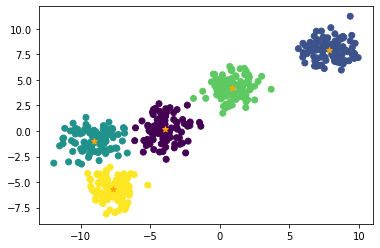

In [97]:
plt.scatter(X[:,0], X[:,1], c=pred)
plt.scatter(centers[:,0], centers[:,1], marker="*", color="orange")
plt.show()

In [95]:
kmeans.score?

In [98]:
### kmeans can still fail

In [100]:
from sklearn.datasets import make_circles, make_moons

In [102]:
X,Y = make_moons(n_samples=200, noise=0.10)

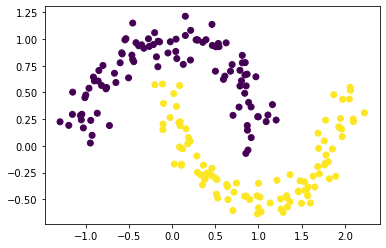

In [104]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [106]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

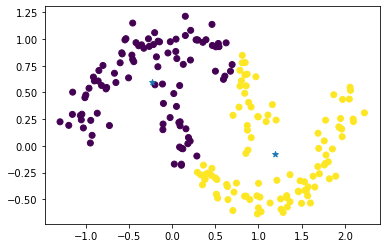

In [112]:
centers = kmeans.cluster_centers_
label = kmeans.labels_

plt.scatter(X[:,0], X[:,1], c=label)
plt.scatter(centers[:,0], centers[:,1], marker="*")
plt.show()